# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [95]:
# i) Importar as libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn.metrics import r2_score

# ii) Carregar od ataset
tips = sns.load_dataset('tips')

In [96]:
# iii) Criar a coluna net_bill
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [97]:
# iv) Criar a matriz de design usando patsy
y, X = dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# v) Fitar o modelo
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           2.64e-20
Time:                        22:13:49   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As variáveis pouco significantes estatisticamente são `sex[T.Female]`, `smoker[T.No]`, `time[T.Dinner]`. Iremos deixá-las de fora do novo modelo.

In [98]:
# vi) Criar matriz de design apenas com net_bill
y, X = dmatrices('tip ~ net_bill', data=tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           5.02e-23
Time:                        22:13:49   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

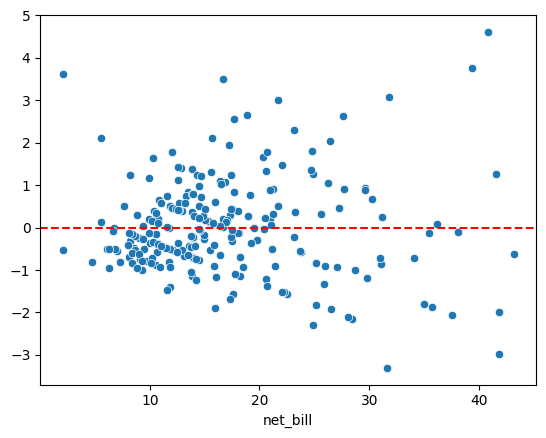

In [99]:
# vii) Exibir os resíduos
residuos = reg.resid
sns.scatterplot(x = 'net_bill', y = residuos, data = tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Os resídos estão com o **padrão de variância crescente**, indicando que nosso modelo pode melhorar.
Vamos testar com transformação logarítmica em `net_bill`:

In [100]:
# Modelo com log de net_bill
y, X = dmatrices('tip ~ np.log(net_bill)', data=tips)
log_reg = sm.OLS(y, X).fit()
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           4.40e-20
Time:                        22:13:49   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O $R^2$ diminuiu, vamos tentar com o polinômio agora.

In [101]:
# Modelo com polinomio de net_bill
y, X = dmatrices('tip ~ net_bill + I(net_bill**2)', data=tips)
poli_reg = sm.OLS(y, X).fit()
poli_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           4.96e-22
Time:                        22:13:49   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0743      0.353      3.039      0.003       0.378       1.770
net_bill             0.1288      0.037      3.493      0.001       0.056       0.202
I(net_bill ** 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

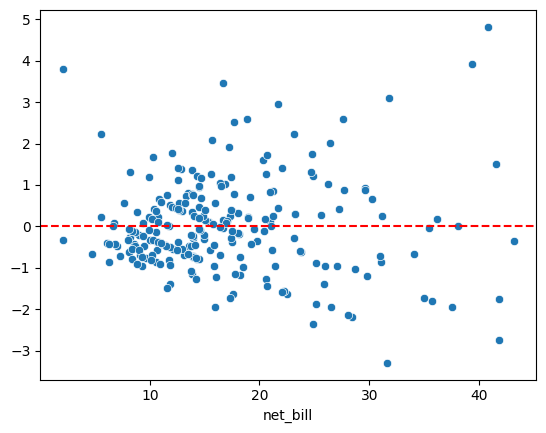

In [102]:
residuos = poli_reg.resid
sns.scatterplot(x = 'net_bill', y = residuos, data = tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

O resultado foi praticamente o mesmo, indicando que provavelment te alguma outra relação que pode ser aplicada em net_bill.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [103]:
# 2, i) Construindo o modelo usando o log de tip
y, X = dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data=tips)
reg_log = sm.OLS(y, X).fit()
residuos_log = reg_log.resid
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           1.21e-18
Time:                        22:13:49   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vamos remover as mesmas variáveis anteriores que não são estatisticamente significantes.

In [104]:
# ii) Criar matriz de design apenas com net_bill
y, X = dmatrices('np.log(tip) ~ net_bill', data=tips)
reg = sm.OLS(y, X).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           2.60e-21
Time:                        22:13:49   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

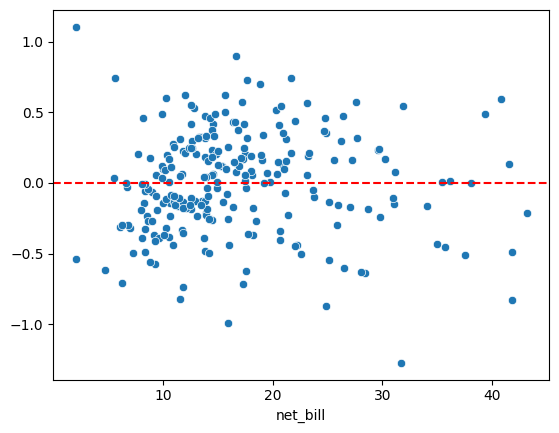

In [105]:
# iii) Vamos criar a visualizão os residuos
sns.scatterplot(x = 'net_bill', y = residuos_log, data = tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [106]:
# iv) Log 
# Modelo com log de net_bill e log de tip
y, X = dmatrices('np.log(tip) ~ np.log(net_bill)', data=tips)
log_reg_ambos = sm.OLS(y, X).fit()
log_reg_ambos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           5.62e-22
Time:                        22:13:49   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# v) Polinômio
y, X = dmatrices('np.log(tip) ~ np.log(net_bill) + I(net_bill**2)', data=tips)
log_reg_poli = sm.OLS(y, X).fit()
log_reg_poli.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     57.02
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           5.30e-21
Time:                        22:13:49   Log-Likelihood:                -95.995
No. Observations:                 244   AIC:                             198.0
Df Residuals:                     241   BIC:                             208.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.2564      0.211     -1.218      0.224      -0.671       0.158
np.log(net_bill)     0.4512      0.090      5.027      0.000       0.274       0.628
I(net_bill ** 2)     0.0001      0.000      0.846      0.398      -0.000       0.000
==============================================================================
Omnibus:                        9.011   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               17.044
Skew:                           0.059   Prob(JB):                     0.000199
Kurtosis:                       4.289   Cond. No.                     4.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
log_reg_poli

# Vamos calcular o R^2 para os dados originais, tips
y_pred = log_reg_poli.predict(X)

# Voltar à escala original
y_pred = np.exp(y_pred)

# Calcular R² na escala original de 'tip'
r2 = r2_score(tips['tip'], y_pred)
print(f"R² na escala original de 'tip':{r2:.2f}")

R² na escala original de 'tip':0.31


O primeiro modelo tem um coeficiente de determinação melhor.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [109]:
# 3, i) Carregar os dados
df = pd.read_csv('previsao_de_renda.csv')
df = df.drop(columns=['Unnamed: 0'])

In [110]:
# ii) Remover nulos
df = df.dropna()

In [111]:
# iii) Ajustando o modelo
y, X = dmatrices('renda ~ tempo_emprego', data=df)

# Fit
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:13:49   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

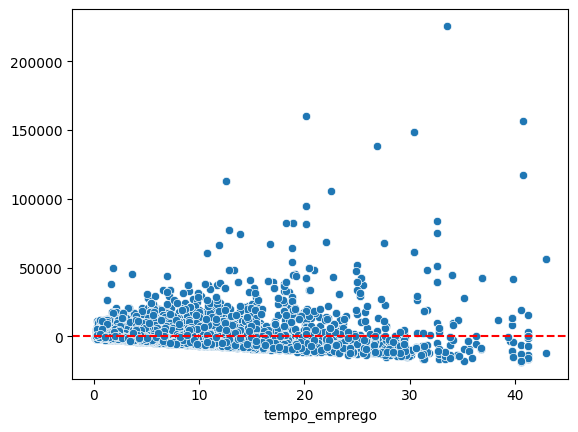

In [112]:
# Resíduos
residuos = reg.resid
sns.scatterplot(x=df['tempo_emprego'], y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.show()

Temos um padrão de resíduos muito claro, vamos aplicar transformações e testar com múltiplas variáveis.

In [114]:
# iii) Aplicando log de renda e fazendo regressão multipla

# Criar fórmula
formula = """
np.log(renda) ~ 
sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + 
tipo_renda + educacao + estado_civil + tipo_residencia + 
idade + tempo_emprego + qt_pessoas_residencia"""

# Gerar matrizes design com Patsy
y, X = dmatrices(formula, data=df)

# Ajustar modelo OLS
modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:13:57   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5847      0.235     28.006      0.000       6.124       7.046
sexo[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
tipo_renda[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
tipo_renda[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
tipo_renda[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
tipo_renda[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
educacao[T.Pós graduação]            0.1071      0.159      0.673      0.501      -0.205       0.419
educacao[T.Secundário]              -0.0141      0.072     -0.196      0.844      -0.155       0.127
educacao[T.Superior completo]        0.0938      0.072      1.298      0.194      -0.048       0.235
educacao[T.Superior incompleto]     -0.0432      0.078     -0.555      0.579      -0.196       0.109
estado_civil[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
estado_civil[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
estado_civil[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
estado_civil[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
tipo_residencia[T.Casa]             -0.0442      0.054     -0.815      0.415      -0.150       0.062
tipo_residencia[T.Com os pais]      -0.0258      0.060     -0.427      0.670      -0.144       0.093
tipo_residencia[T.Comunitário]      -0.1196      0.105     -1.135      0.256      -0.326       0.087
tipo_residencia[T.Estúdio]           0.0665      0.099      0.670      0.503      -0.128       0.261
tipo_residencia[T.Governamental]    -0.0571      0.066     -0.865      0.387      -0.186       0.072
qtd_filhos                          -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego                        0.0617      0.001     59.398      0.000       0.060       0.064
qt_pessoas_residencia                0.2926      0.108      2.716      0.007       0.081       0.504
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.839
Skew:             

Iremos manter as variáveis que são estatisticamente significantes: `sexo[T.M]`, `posse_de_veiculo[T.True]`, `posse_de_imovel[T.True]`, `tipo_renda[T.Empresário]`, `estado_civil[T.Separado]`, `estado_civil[T.Viúvo]`, `idade`, `tempo_emprego	`, `qt_pessoas_residencia`.

In [117]:
# iv) Criar nova fórmula pra manter as variáveis estatisticamnte significantes
formula_nova = """
np.log(renda) ~
sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + estado_civil + idade + tempo_emprego + qt_pessoas_residencia
"""

# Gerar matrizes design com Patsy
y, X = dmatrices(formula_nova, data=df)

# Fitar um modelo
modelo_novo = sm.OLS(y, X).fit()
residuos_modelo_novo = modelo_novo.resid
modelo_novo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     484.9
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:22:15   Log-Likelihood:                -13605.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12412   BIC:                         2.735e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.1016      0.045    157.594      0.000       7.013       7.190
sexo[T.M]                          0.7815      0.015     53.450      0.000       0.753       0.810
posse_de_veiculo[T.True]           0.0533      0.014      3.773      0.000       0.026       0.081
posse_de_imovel[T.True]            0.0850      0.014      6.180      0.000       0.058       0.112
tipo_renda[T.Bolsista]             0.3000      0.242      1.241      0.214      -0.174       0.774
tipo_renda[T.Empresário]           0.1651      0.015     11.093      0.000       0.136       0.194
tipo_renda[T.Pensionista]         -0.2555      0.242     -1.057      0.291      -0.729       0.218
tipo_renda[T.Servidor público]     0.0770      0.022      3.475      0.001       0.034       0.120
estado_civil[T.Separado]           0.0696      0.029      2.366      0.018       0.012       0.127
estado_civil[T.Solteiro]           0.0101      0.024      0.428      0.669      -0.036       0.056
estado_civil[T.União]             -0.0361      0.025     -1.433      0.152      -0.086       0.013
estado_civil[T.Viúvo]              0.1043      0.043      2.424      0.015       0.020       0.189
idade                              0.0049      0.001      6.221      0.000       0.003       0.006
tempo_emprego                      0.0617      0.001     59.379      0.000       0.060       0.064
qt_pessoas_residencia              0.0292      0.009      3.349      0.001       0.012       0.046
==============================================================================
Omnibus:                        1.133   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                1.103
Skew:                           0.020   Prob(JB):                        0.576
Kurtosis:                       3.023   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

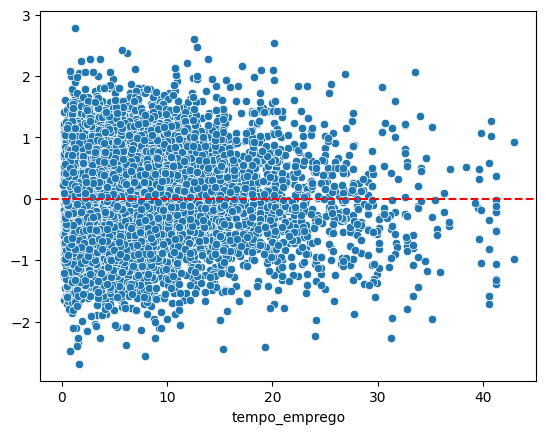

In [118]:
# Analisar os residuos do novo modelo
sns.scatterplot(x=df['tempo_emprego'], y=residuos_modelo_novo)
plt.axhline(0, color='red', linestyle='--')
plt.show()

A transformação logaritma reduziu bastante o ruído, embora ainda existam certos padrões (os dados são agrupados à esquerda), transformações mais precisas e subsequentes tornariam-se necessárias para aprimorar mais o modelo.